In [328]:
#Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [329]:
LR = LinearRegression()

In [330]:
df=pd.read_csv('superheated_vapor_properties.csv')

In [331]:
print(df.shape)

(544, 37)


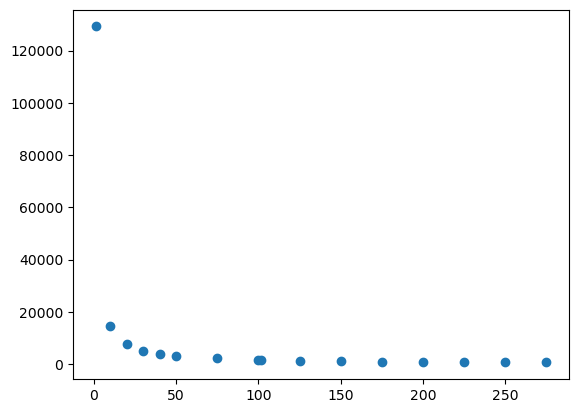

In [332]:
data1 = df[(df['Property']=='V') & (df['Pressure']<300)]
y = data1['Vap_Sat']
x =data1['Pressure']
plt.scatter(x,y)

In [333]:
def normalize(x):
    x = (x-np.mean(x))/np.std(x);
    return x;

In [334]:
N = x.shape[0]
L=[]

In [335]:
def cost_func(y,y_hat):
    cost =((y-y_hat)**2)/2
    return cost.mean()

In [336]:
def gradient_descent(y,x,m,c):
    dm = np.sum(x*(-y+m*x+c))
    dc =  np.sum((-y+m*x+c))
    return dm,dc

No. of iterations: 0


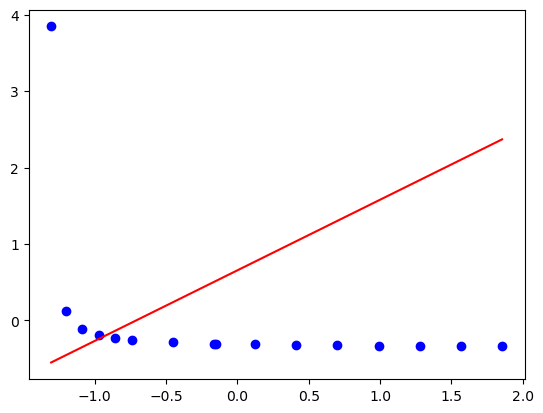

No. of iterations: 100


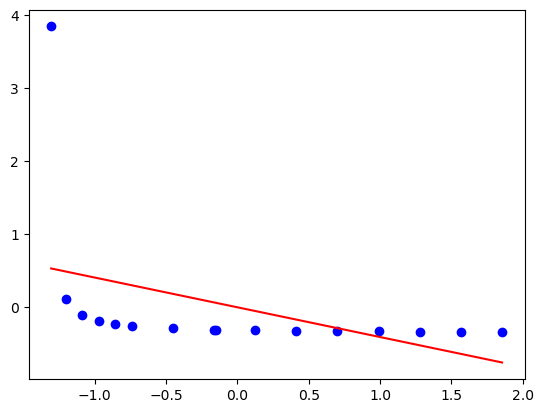

No. of iterations: 200


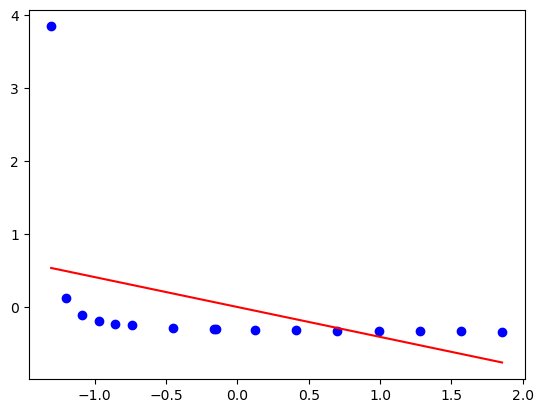

No. of iterations: 300


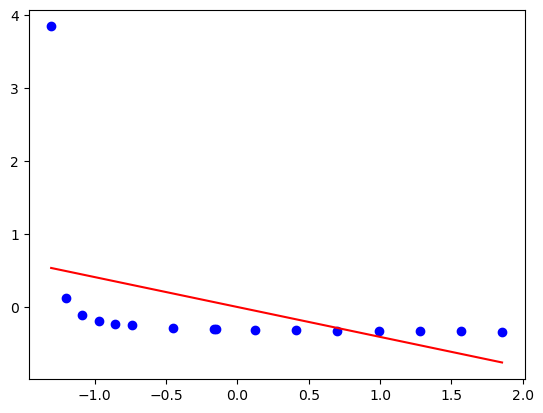

No. of iterations: 400


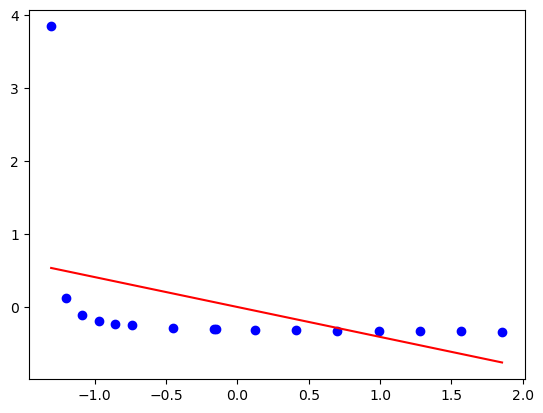

No. of iterations: 500


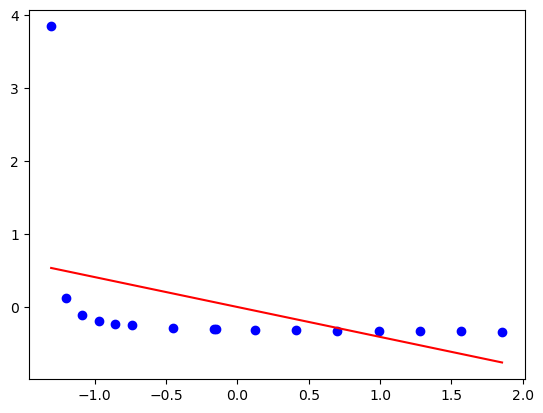

No. of iterations: 600


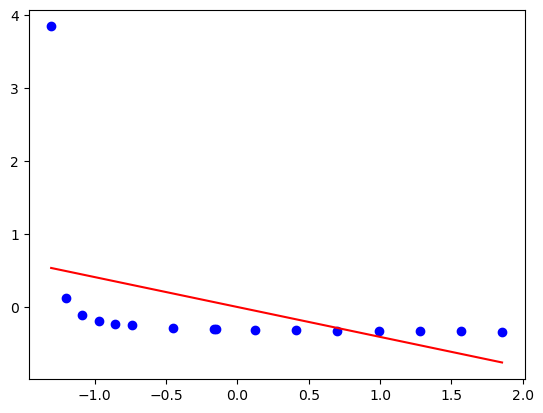

No. of iterations: 700


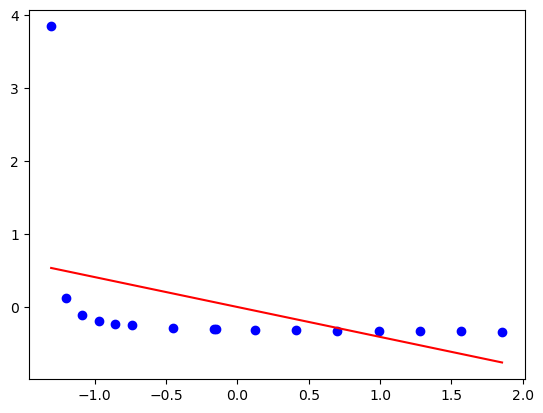

No. of iterations: 800


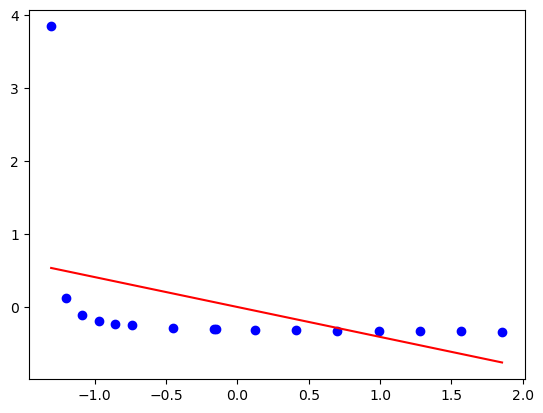

No. of iterations: 900


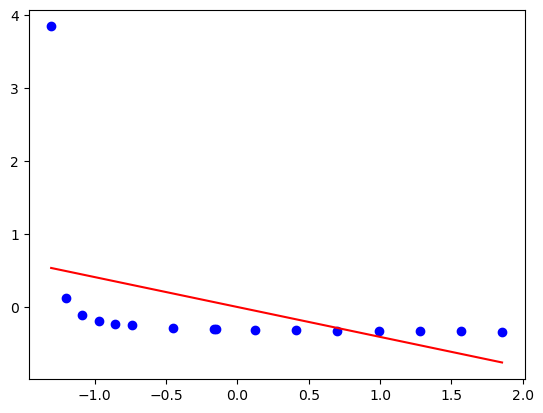

No. of iterations: 1000


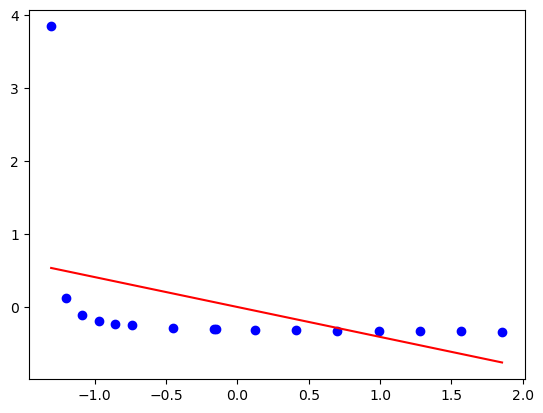

No. of iterations: 1100


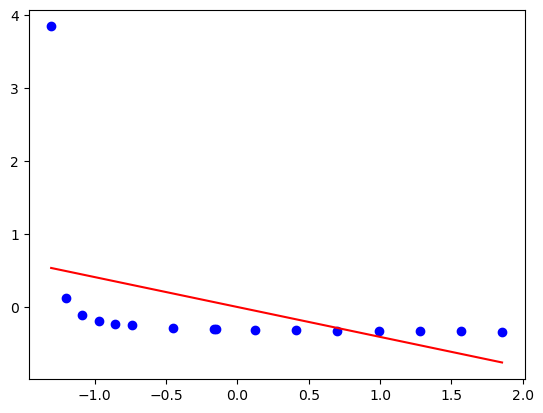

Slope is  [-0.41006817]
Intercept is  [-4.16881913e-17]


In [337]:
#Initialising Hyperparameters
epoch = 1200
alpha=0.03

#Random value of m and c
m= np.random.rand(1)
c= np.random.rand(1)

#Normalizing our data
x = normalize(x)
y = normalize(y)

for _ in range(epoch):
        y_hat =m*x+c
        L.append(cost_func(y,y_hat))
        
        #Gradient Descent
        dm,dc= gradient_descent(y,x,m,c)
        
        #Updating Values
        m= m-2*(alpha/N)*dm
        c= c-2*(alpha/N)*dc
        
        #Stopping condition on cost function
        if (cost_func(y,y_hat))<0.001:
         break
        
       
        if _%100==0:
           print("No. of iterations:",_)
           plt.plot(x,y,'bo')
           plt.plot(x,y_hat,'r-')
           plt.show()
            
print("Slope is ",m)
print("Intercept is ",c)  

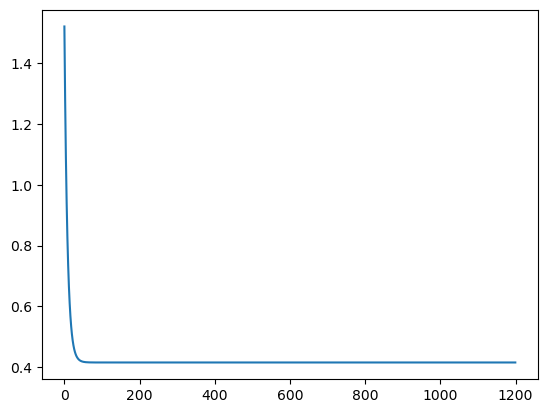

In [338]:
plt.plot(L)

In [339]:
R2score = np.sum((y_hat -np.mean(y))**2)/np.sum((y -np.mean(y))**2)
print("R2 Score is ",R2score)

R2 Score is  0.16815590648253134


Intercept is  [-2.27633564e-17]
Slope is  [[-0.41006817]]


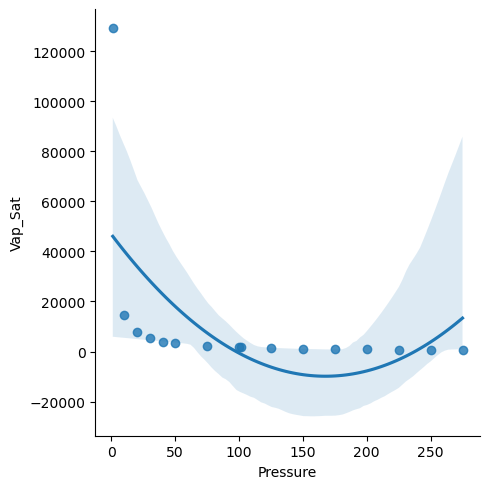

In [340]:
sns.lmplot(x='Pressure',y ="Vap_Sat",data = data1,order=2)
x =np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
LR.fit(x,y)
intercept=LR.intercept_
slope=LR.coef_
print("Intercept is ",intercept)
print("Slope is ",slope)

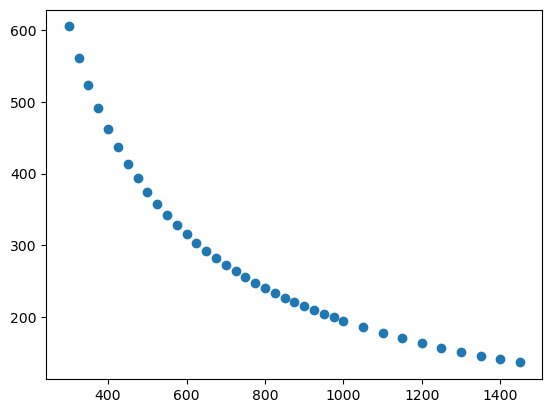

In [341]:
y_2 = df[(df['Property']=='V') & (df['Pressure']>=300) & (df['Pressure']<1500)]
y2 = y_2['Vap_Sat']
x2= y_2['Pressure']
plt.scatter(x2,y2)
N= x2.shape[0]
L=[]

No. of iterations: 0


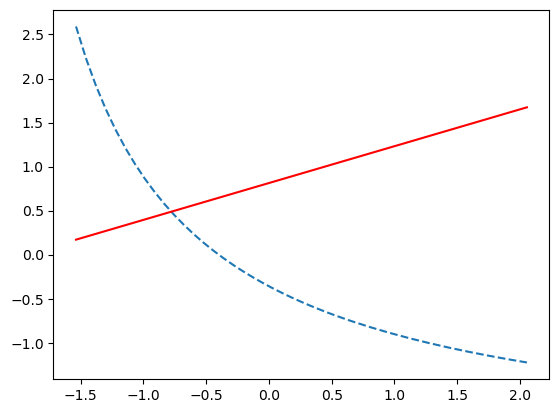

No. of iterations: 100


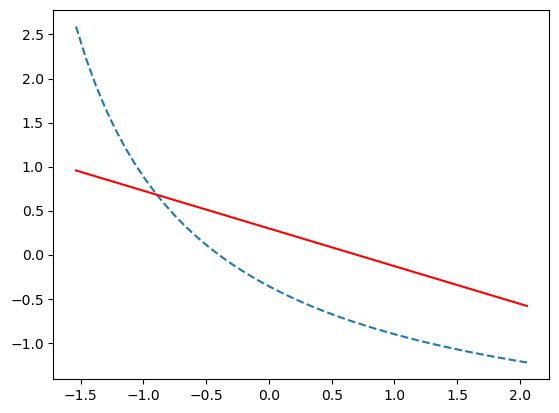

No. of iterations: 200


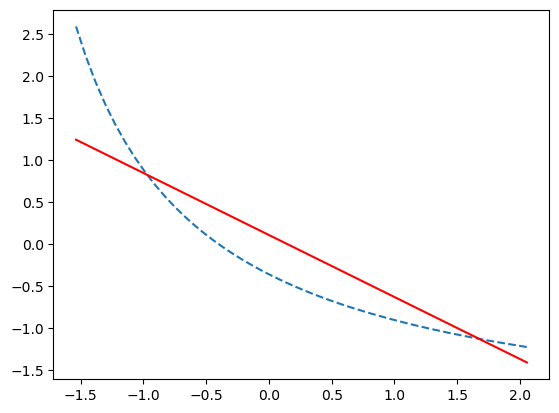

No. of iterations: 300


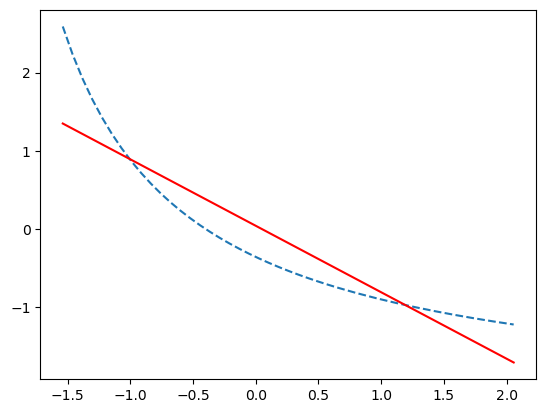

No. of iterations: 400


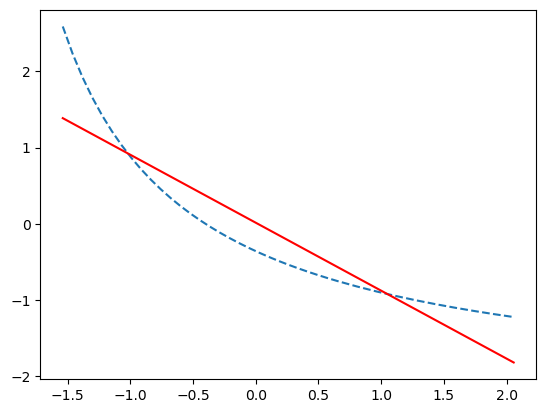

No. of iterations: 500


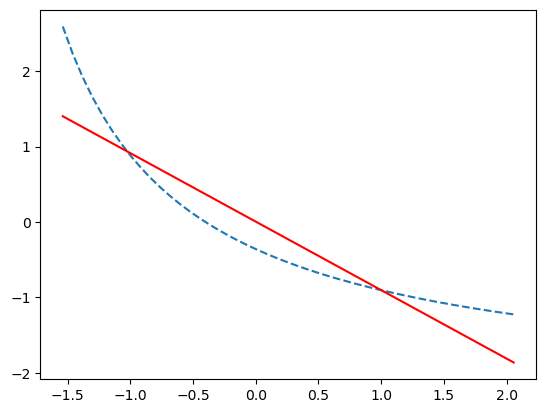

No. of iterations: 600


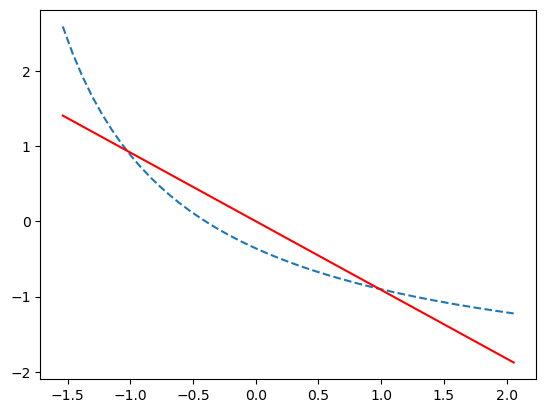

No. of iterations: 700


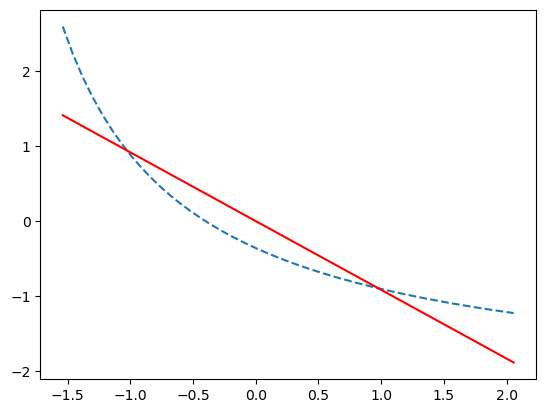

No. of iterations: 800


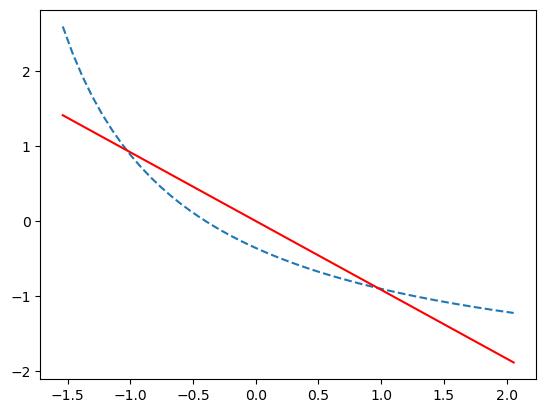

Slope is  [-0.91648438]
Intercept is  [9.59450236e-05]


In [342]:
#HyperParameter Initialization
epochs = 900
alpha=0.01

#Random value of m and c
m= np.random.rand(1)
c= np.random.rand(1)

#Normalizing aur data
y2 = normalize(y2)
x2 = normalize(x2)

for _ in range(epochs):
        yhat =m*x2+c
        L.append(cost_func(y2,yhat))
        
        #Gradient Descent
        dm,dc= gradient_descent(y2,x2,m,c)
        
        #Updating values
        m= m-(alpha/N)*dm
        c= c-(alpha/N)*dc
   
        if cost_func(y2,yhat)<0.001:
         break
       
        if _%100==0:
          print("No. of iterations:",_)
          plt.plot(x2,y2,'--')
          plt.plot(x2,yhat,'r-')
          plt.show()
         
print("Slope is ",m)
print("Intercept is ",c)

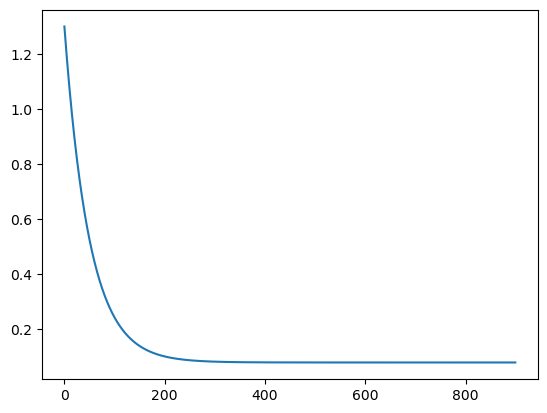

In [343]:
plt.plot(L)

In [344]:
R2score_2 =  np.sum((yhat -np.mean(y2))**2)/np.sum((y2 -np.mean(y2))**2)
R2score_2

0.8399407176255248

Intercept is  [-2.61976874e-16]
Slope is  [[-0.91664181]]


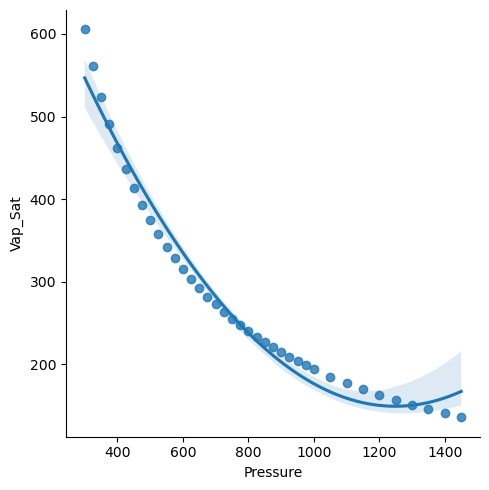

In [345]:
sns.lmplot(x='Pressure',y ="Vap_Sat",data = y_2,order=2)
x2 =np.array(x2).reshape(-1,1)
y2 = np.array(y2).reshape(-1,1)
LR.fit(x2,y2)
print("Intercept is ",LR.intercept_)
print("Slope is ",LR.coef_)

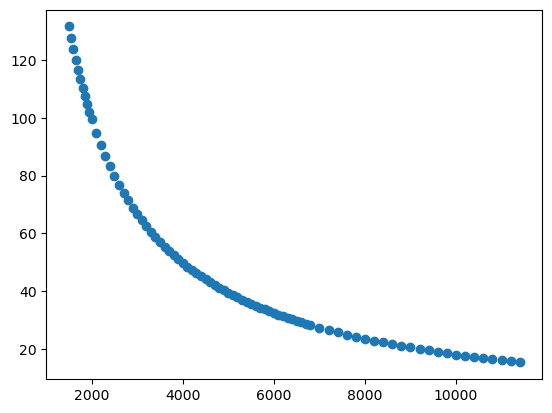

In [346]:
y_3 = df[(df['Property']=='V') & (df['Pressure']>=1500)]
y3 = y_3['Vap_Sat']
x3= y_3['Pressure']
plt.scatter(x3,y3)
L2=[]
N= x3.shape[0]

No. of iterations: 0


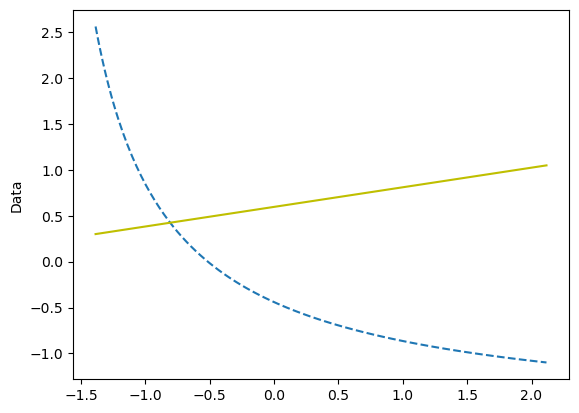

No. of iterations: 100


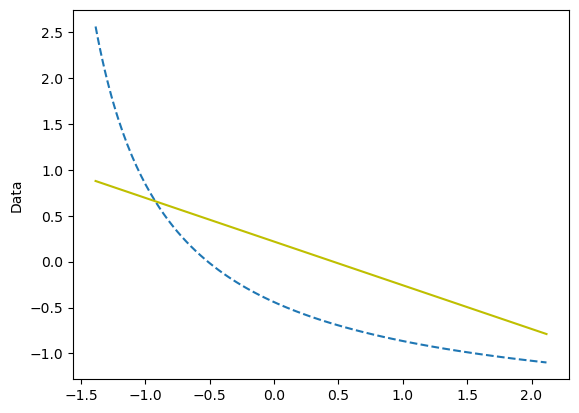

No. of iterations: 200


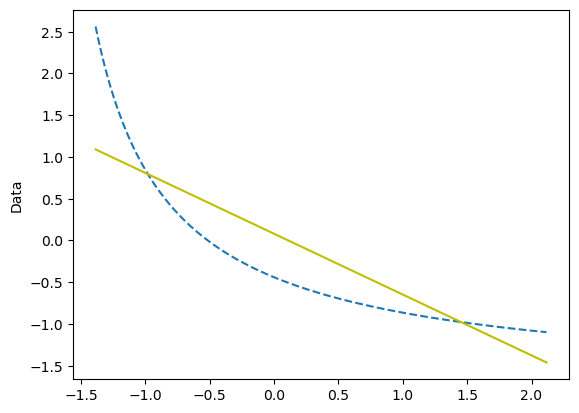

No. of iterations: 300


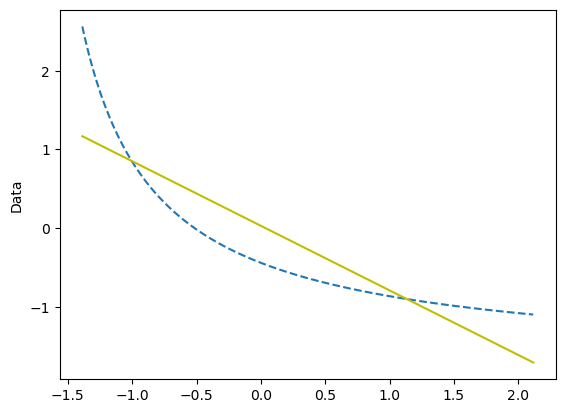

No. of iterations: 400


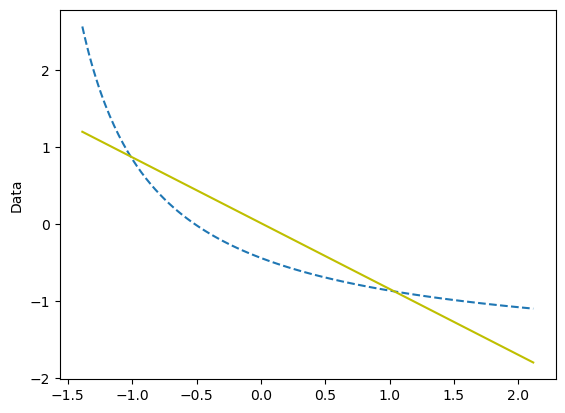

No. of iterations: 500


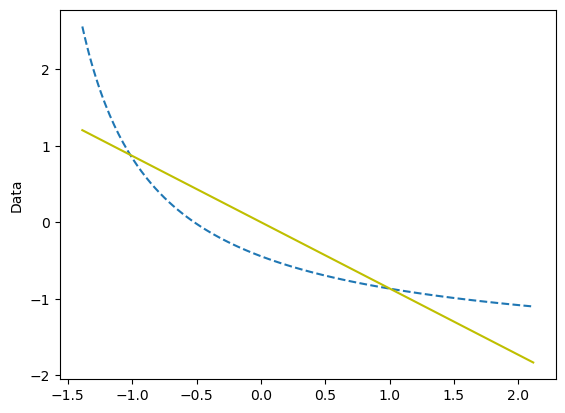

No. of iterations: 600


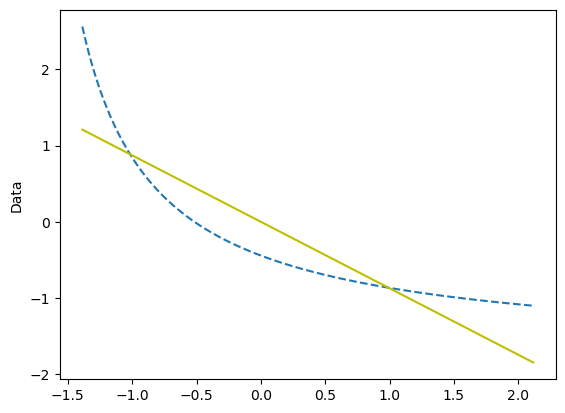

No. of iterations: 700


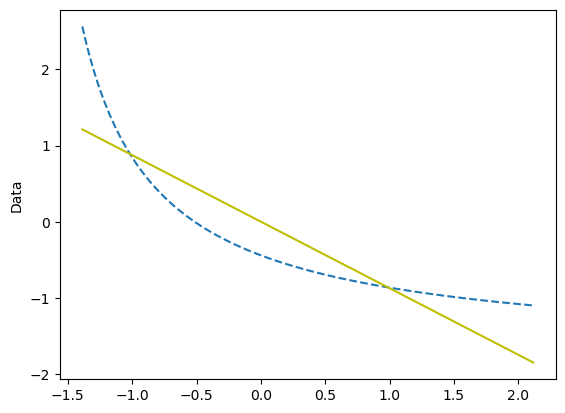

No. of iterations: 800


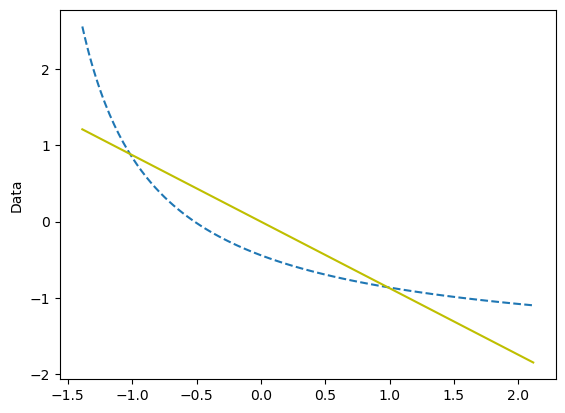

No. of iterations: 900


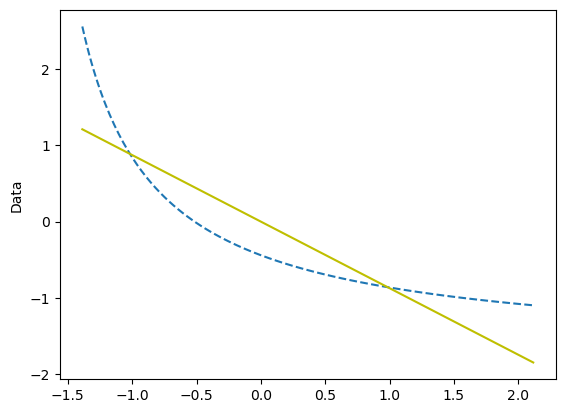

No. of iterations: 1000


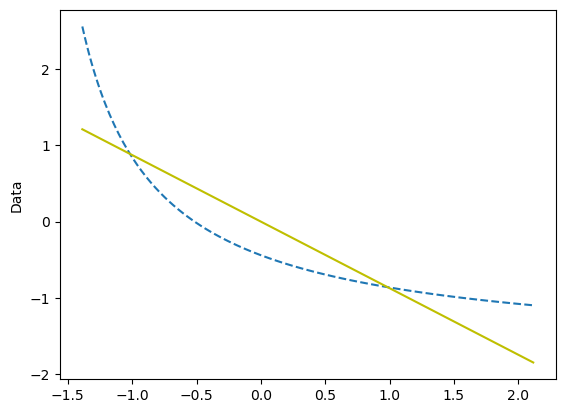

No. of iterations: 1100


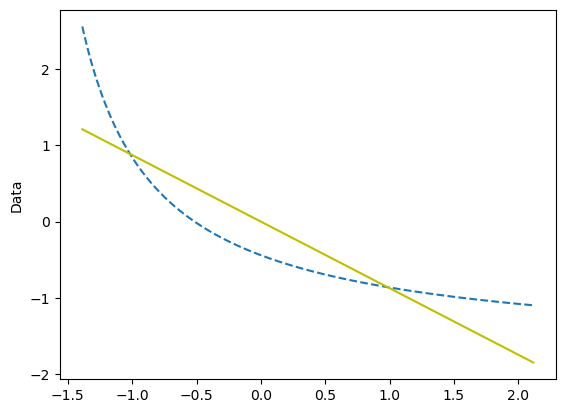

Slope is  [-0.87411959]
Intercept is  [3.45139218e-06]


In [347]:
#Hyperparameter Initialization
epochs = 1200
alpha =0.01
 
#Random value of m and c
m3= np.random.rand(1)
c3= np.random.rand(1)

#Normalizing our data
x3 = normalize(x3)
y3 = normalize(y3)

for j in range(epochs):
        yh3 =m3*x3+c3
        L2.append(cost_func(y3,yh3))
        
        dm,dc= gradient_descent(y3,x3,m3,c3)
        
        m3= m3-(alpha/N)*dm
        c3= c3-(alpha/N)*dc
   
        if cost_func(y3,yh3)<0.001:
         break
       
       
        if j%100==0:
          print("No. of iterations:",j)
          plt.plot(x3,y3,'--')
          plt.plot(x3,yh3,'y-')
          plt.ylabel('Data')
          plt.show()

print("Slope is ",m3)
print("Intercept is ",c3)
plt.show()

In [348]:
R2score_3 = np.sum((yh3 -np.mean(y3))**2)/np.sum((y3 -np.mean(y3))**2)
print("The R2 score is ",R2score_3)

The R2 score is  0.7640849399980544


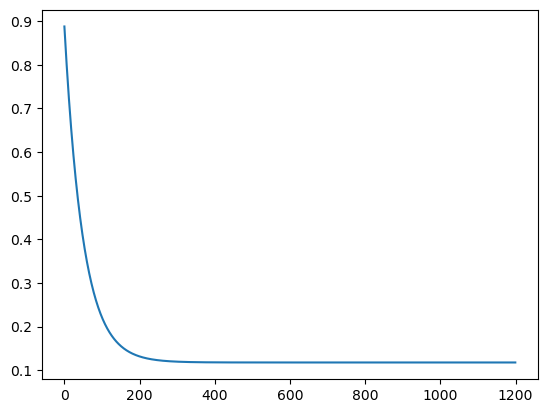

In [349]:
plt.plot(L2)

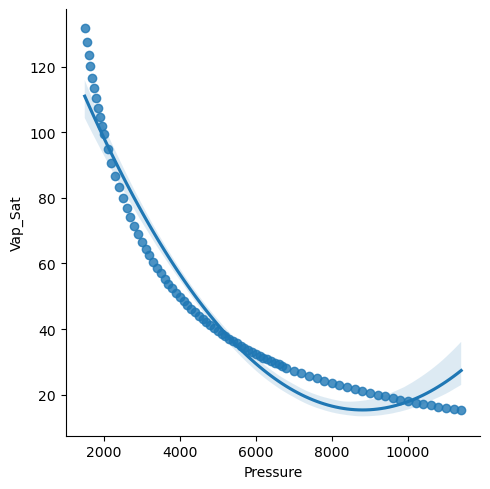

In [350]:
sns.lmplot(x='Pressure',y ="Vap_Sat",data = y_3,order=2)

In [351]:
x3 =np.array(x3).reshape(-1,1)
y3 = np.array(y3).reshape(-1,1)
LR.fit(x3,y3_)
print("Intercept is ",LR.intercept_)
print("Slope is ",LR.coef_)

Intercept is  [3.04302986e-17]
Slope is  [[-0.87412588]]
